# Clase 20
Se clasificaran imagenes con digitos numericos para saber cuales numeros son y tambien clasificaremos la base de datos sms-spam

## Digitos numericos
Primero conoceremos nuestra base de datos

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


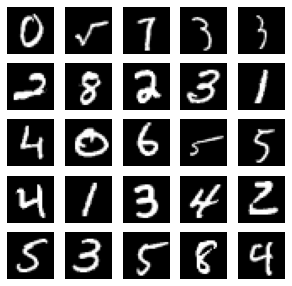

In [4]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
# plot the 25 mnist digits
plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()
plt.close('all')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
num_labels = len(np.unique(y_train))
# Numero de clases
num_labels

10

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Red neuronal

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

In [10]:
#transformamos los vectores y a one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
# Obtenemos el tamaño de la capa de entrada de la red, es decir, el total de pixeles de las imagenes
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [13]:
# Concatenaremos los pixeles de cada imagen
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])
# Colocamos las intensidades [0, 255] a valores entre [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#### Hiperparámetros

In [14]:
# Se tomará un batch de 128 imágenes, el algo tomará 1 al azar y minimizará la perdida en función de ese punto
batch_size = 128
# Número de neuronas de capas ocultas
hidden_units = 256
# Al momento de entrenar con backpropagation, 
# no se ajustarán un 45% de parametros, que menos influyen en la funcion de error
dropout = 0.45

#### Construir red neuronal

In [15]:
# Armar la red neuronal capa por capa
model = Sequential()

- Primera capa, densa, de *hidden_units* neuronas y *input_size* entradas.
- Segunda capa, densa, interna.
- Tercera capa, densa, de 10 neuronas para los labels.

Además la funcion de activación será ReLU, excepto la última que será Soft Max

In [16]:
# Primera capa, Entrada
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Segunda capa
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Tercera capa, Salida
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [18]:
#numero de parametros de la primera capa = tamaño de imagen * numero de neuronas
785*256 

200960

In [19]:
#numero de parametros de la segunda capa = numero de parametros de 1 neurona+sesgo * numero de neuronas
(256+1)*256

65792

In [20]:
#numero de parametros de la tercera capa = numero de parametros de 1 neurona+sesgo * numero de neuronas
(256+1)*10

2570

In [21]:
#compilar modelo
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [22]:
#Entrenar modelo
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

#validar el modelo en el dataset de test para determinar generalizaciones
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\n Test accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4352 - accuracy: 0.8653
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1957 - accuracy: 0.9414
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1533 - accuracy: 0.9541
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1270 - accuracy: 0.9617
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1140 - accuracy: 0.9651
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1029 - accuracy: 0.9678
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0932 - accuracy: 0.9712
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.9721
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9738
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.9752

## Sms-spam

### Adquisicion y Preprocesamiento

In [23]:
import pandas as pd
from nlpia.data.loaders import get_data

pd.options.display.width = 120

sms = get_data("sms-spam")
index = ['sms{}{}'.format(i,'!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms.index = index
sms['spam'] = sms.spam.astype(int)
sms.head(6)

d:\program files\python37\lib\site-packages\pugnlp\constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
d:\program files\python37\lib\site-packages\pugnlp\constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
d:\program files\python37\lib\site-packages\pugnlp\tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
d:\program files\python37\lib\site-packages\pugnlp\util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
INFO:nlpia.constants:Sta

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only ..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup fina...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives aro..."
sms5!,1,FreeMsg Hey there darling it's been 3 week's n...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
#tfidf_docs = tfidf_docs - tfidf_docs.mean(axis=0)
tfidf_docs.shape

(4837, 9232)

In [25]:
sms.spam.sum()

638

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tfidf_docs, sms.spam, test_size=0.4,
                                                   random_state=271828, stratify=sms.spam)

In [27]:
# En el conjunto de test, los mensajes de spam que quedaron fueron
y_test.sum()

255

In [28]:
import numpy as np

# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

2

In [29]:
print(np.min(x_train))
print(np.max(x_train))

0.0
1.0


In [37]:
from keras.utils import to_categorical
# Convertimos los labels en vectores one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Red neuronal

In [38]:
input_size = x_train.shape[1]

# hiperparametros
batch_size = 256
hidden_units = 16
dropout = 0.45
epochs = 15

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                147728    
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 34        
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 147,762
Trainable params: 147,762
Non-trainable params: 0
_________________________________________________________________


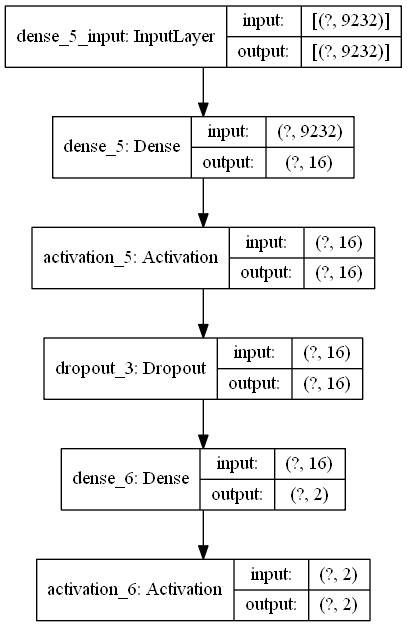

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()

# Primera
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Segunda
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [32]:
(9232+1)*16 #num parametros primera capa

147728

In [33]:
(16+1)*2

34

In [40]:
#compilamos
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\n Test accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/15
12/12 [==============================] - 0s 41ms/step - loss: 0.6700 - accuracy: 0.8101 - val_loss: 0.6373 - val_accuracy: 0.8682
Epoch 2/15
12/12 [==============================] - 0s 20ms/step - loss: 0.6075 - accuracy: 0.8718 - val_loss: 0.5763 - val_accuracy: 0.8708
Epoch 3/15
12/12 [==============================] - 0s 19ms/step - loss: 0.5460 - accuracy: 0.8773 - val_loss: 0.5165 - val_accuracy: 0.8765
Epoch 4/15
12/12 [==============================] - 0s 21ms/step - loss: 0.4826 - accuracy: 0.8959 - val_loss: 0.4597 - val_accuracy: 0.8972
Epoch 5/15
12/12 [==============================] - 0s 21ms/step - loss: 0.4294 - accuracy: 0.9128 - val_loss: 0.4078 - val_accuracy: 0.9106
Epoch 6/15
12/12 [==============================] - 0s 20ms/step - loss: 0.3770 - accuracy: 0.9263 - val_loss: 0.3613 - val_accuracy: 0.9204
Epoch 7/15
12/12 [==============================] - 0s 20ms/step - loss: 0.3327 - accuracy: 0.9376 - val_loss: 0.3209 - val_accuracy: 0.9302
Epoch 8/15
12

### Guardar modelo
Se guarda el modelo con la funcion *.to_json()*
Tambien se guardan los pesos *.save_weights("mlp_weights.h5")*

In [42]:
model_structure = model.to_json()
with open("mlp_model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("mlp_weights.h5")

### Grafica de como se comportó el modelo durante el entrenamiento
Se muestra grafico de exactitud v/s epocas y de funcion de perdida v/s epocas

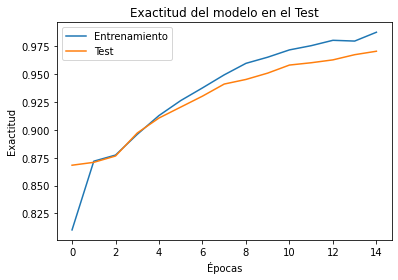

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Exactitud del modelo en el Test")
plt.ylabel('Exactitud')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
#plt.savefig("Exactitud.jpg", bbox_inches='tight', dpi=300)
plt.show()

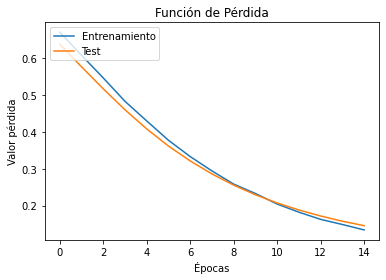

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Función de Pérdida")
plt.ylabel('Valor pérdida')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
#plt.savefig("Perdida.jpg", bbox_inches='tight', dpi=300)
plt.show()

### Usar modelo

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score

#y_pred = model.predict_classes(x_test)
#deprecated
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [55]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
y_test = np.argmax(y_test, axis=1)

In [57]:
y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión")
print(matrix)

Matriz de Confusión
[[1680    0]
 [  57  198]]


Se observa que el modelo muestra más datos que no son spam de los que si hay spam, debido a que el modelo no estaba balanceado (habian mas datos no spam que spam)

Calculamos entonces, que tan bien clasifica spam

In [59]:
198/(198+57)

0.7764705882352941

Y que tan bien clasifica no spam

In [60]:
1680/(1680+0)

1.0

In [61]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy")
print(acc)

Accuracy
0.9705426356589147
